<a href="https://colab.research.google.com/github/j23-cs167/project-2-20aclaypool/blob/main/Project2_Claypool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Aubrionna Claypool

Proposed Points (out of 25): 23

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I'm taking a dataset about housing prices from Kaggle. I took this data because it has two columns I would like to compare which is 'waterfront' and 'view'. A few other colums include: 'price', 'bedrooms',	'bathrooms',	'sqft_living', 'sqft_lot', and so on. 

I want to run a regression model to predict housing prices. However, I want to compare a model with 'waterfront' and 'view' to see which has a better R^2, MAE, and MSE.


https://www.kaggle.com/code/mayanksrivastava/predict-housing-prices-simple-linear-regression/data

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [34]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = '/content/drive/MyDrive/CS167/datasets/kc_house_data.csv'
data = pd.read_csv(path)
print('data shape: ',data.shape)

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data shape:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
import warnings
data.isna().any() #no missing data

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

# 3. Research

Put your code and your experiments here.

In [30]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

water_pred = ['bedrooms','bathrooms','sqft_living','sqft_lot', 'waterfront', 'yr_built']
water_target = ['price']

train_data, test_data, train_sln, test_sln = train_test_split(data[water_pred], data[water_target], test_size = 0.2, random_state=41)

In [22]:
 #without any modifcations
forest = RandomForestRegressor(random_state=1)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

<ipython-input-22-d648271c5be5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data,train_sln)


MSE:  51781499613.96446
MAE:  146060.44269903254
r2:  0.6845771944965882


<ipython-input-23-bf9367071605>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data,train_sln)
<ipython-input-23-bf9367071605>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-23-bf9367071605>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-23-bf9367071605>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-23-bf9367071605>:13: DataConversionWarning: A column-vector y was passed when a

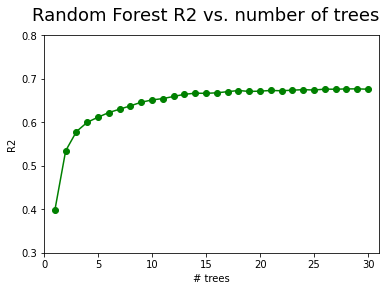

In [23]:
import matplotlib.pyplot as plt
forest = RandomForestRegressor()
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)

def tune_number_of_trees(n_estimator_values):
    rf_r2 = []

    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators=n, random_state=1)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.r2_score(test_sln,curr_predictions)
        rf_r2.append(curr_accuracy);


    plt.suptitle('Random Forest R2 vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('R2')
    plt.plot(n_estimator_values,rf_r2,'go-')
    plt.axis([0,n_estimator_values[-1]+1,.3,.8])

    plt.show()
    
tune_number_of_trees(range(1,31))

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

mlp = MLPRegressor(random_state=1)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE:  370905042736.1783
MAE:  482227.3475540131
r2:  -1.2593379880342015


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
view_pred = ['bedrooms','bathrooms','sqft_living','sqft_lot', 'view', 'yr_built']
view_target = ['price']

train_data, test_data, train_sln, test_sln = train_test_split(data[view_pred], data[view_target], test_size = 0.2, random_state=41)

In [6]:
forest = RandomForestRegressor(random_state=1)
forest.fit(train_data,train_sln)
view_predictions = forest.predict(test_data)

print('MSE: ', metrics.mean_squared_error(test_sln, view_predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, view_predictions))
print('r2: ', metrics.r2_score(test_sln, view_predictions))

<ipython-input-6-b5d36ea366e5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data,train_sln)


MSE:  53614175642.314804
MAE:  144990.09361046422
r2:  0.6734135970969248


<ipython-input-9-9c6050ee9078>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data,train_sln)
<ipython-input-9-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-9-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-9-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  curr_rf.fit(train_data,train_sln)
<ipython-input-9-9c6050ee9078>:12: DataConversionWarning: A column-vector y was passed when a 1d a

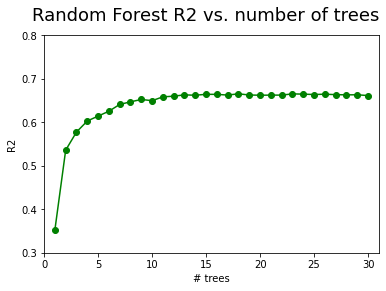

In [9]:
import matplotlib.pyplot as plt
forest = RandomForestRegressor()
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)

def tune_number_of_trees(n_estimator_values):
    rf_r2 = []

    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators=n, random_state=1)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.r2_score(test_sln,curr_predictions)
        rf_r2.append(curr_accuracy);


    plt.suptitle('Random Forest R2 vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('R2')
    plt.plot(n_estimator_values,rf_r2,'go-')
    plt.axis([0,n_estimator_values[-1]+1,.3,.8])

    plt.show()
    
tune_number_of_trees(range(1,31))

In [33]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

mlp = MLPRegressor(random_state=1)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE:  362836038488.4365
MAE:  479633.8906387943
r2:  -1.210186303042149


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I discovered that both 'view' and 'waterfront' had a similar significant impact in predicting house prices. Both produced an R^2 around 68% which isn't too low, but still isn't as high as I would have liked. So, I tried using MLPRegressor to hopefully produce a higher R^2, but it produced a a negative R^2 for both 'view' and 'waterfront'. The MLP models may not have worked as well because I may have used too many hidden layers, not enough number of iterations, or other possiblities. There is chance to get a higher R^2 with any of the models if you change the parameters.

It also makes me curious to see what the models wound produce if they were changed to Classifiers, and instead of them predicting the price, they predicted whether a property had a view or waterfront. Would it produce a high or low accuracy? Or would it be medicore similar to Regresssor models? If we changed the predictors, how drastically would change the R^2? What if the models were used on another dataset with the same predictors, would it fit better or worse?

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

There was only one challenge I encountered which was the data. I was unsure what data to use. When I decided on predicting housing prices, I was going to use the boston_house_data, but it didn't have the columns that I was interested in. So, I continues on Kaggle to find something. Many datasets I viewed had roughly 5-10 columns that didn't have what I was looking for. 